In [2]:
import pandas as pd


import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED 

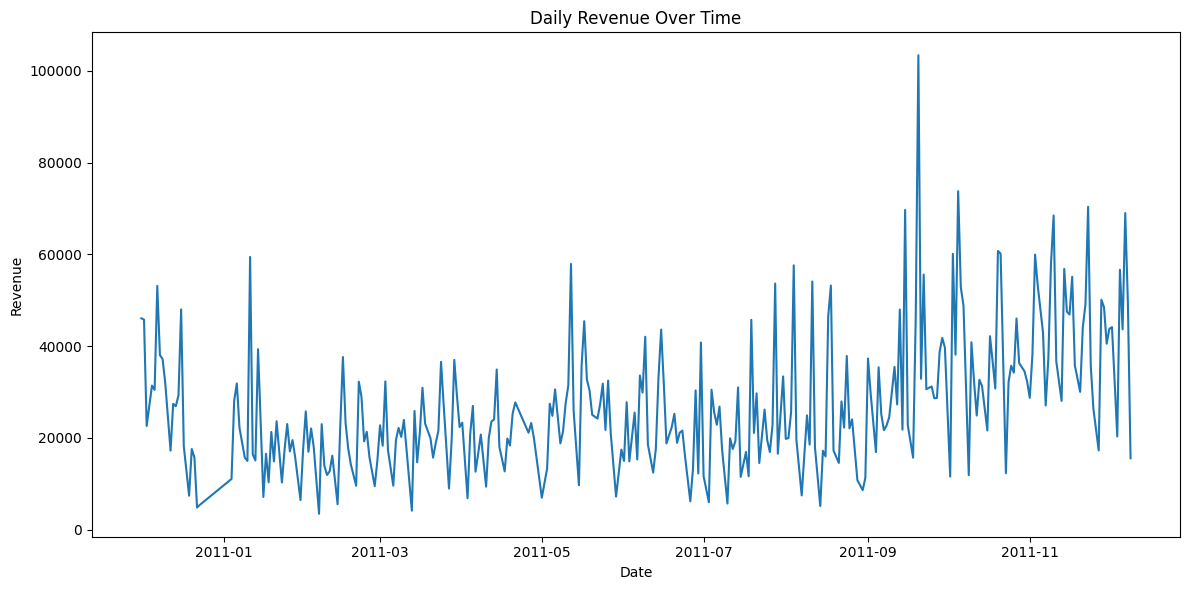

In [15]:

df=pd.read_csv('/content/drive/MyDrive/Copy of data.csv',encoding="ISO-8859-1")

print(df.info())
print(df.head())

df = df.dropna(subset=['CustomerID'])

df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])

df['Revenue']=df['Quantity']*df['UnitPrice']
Daily_rev= df.groupby(df['InvoiceDate'].dt.date)['Revenue'].sum()
Daily_rev.head()
plt.figure(figsize=(12,6))
Daily_rev.plot()
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

In [10]:
total_missing = df.isnull().sum().sum()
print(total_missing)

0


In [16]:
Daily_rev_df=Daily_rev.reset_index()
Daily_rev_df.columns =['Date', 'Revenue']
Daily_rev_df['Date'] = pd.to_datetime(Daily_rev_df['Date'])

In [27]:
Daily_rev_df['day_w']=Daily_rev_df['Date'].dt.dayofweek
Daily_rev_df['day_m']=Daily_rev_df['Date'].dt.day
Daily_rev_df['month']=Daily_rev_df['Date'].dt.month
Daily_rev_df['year']=Daily_rev_df['Date'].dt.year
Daily_rev_df['day_y']=Daily_rev_df['Date'].dt.dayofyear
Daily_rev_df['week_y']=Daily_rev_df['Date'].dt.isocalendar().week.astype(int)


,Date,Revenue,dayofweek,dayofmonth,month,year,dayofyear,day_w,day_m,day_y,week_y
0,2010-12-01,46051.26,2,1,12,2010,335,2,1,335,48
1,2010-12-02,45775.43,3,2,12,2010,336,3,2,336,48
2,2010-12-03,22598.46,4,3,12,2010,337,4,3,337,48
3,2010-12-05,31380.60,6,5,12,2010,339,6,5,339,48
4,2010-12-06,30465.08,0,6,12,2010,340,0,6,340,49
...,...,...,...,...,...,...,...,...,...,...,...
300,2011-12-05,56634.53,0,5,12,2011,339,0,5,339,49
301,2011-12-06,43659.20,1,6,12,2011,340,1,6,340,49
302,2011-12-07,68991.27,2,7,12,2011,341,2,7,341,49
303,2011-12-08,49442.19,3,8,12,2011,342,3,8,342,49


In [19]:
Daily_rev_df.head()

,Date,Revenue,dayofweek,dayofmonth,month,year,dayofyear,weekofyear,day_w,day_m,day_y,week_y
0,2010-12-01,46051.26,2,1,12,2010,335,48,2,1,335,48
1,2010-12-02,45775.43,3,2,12,2010,336,48,3,2,336,48
2,2010-12-03,22598.46,4,3,12,2010,337,48,4,3,337,48
3,2010-12-05,31380.60,6,5,12,2010,339,48,6,5,339,48
4,2010-12-06,30465.08,0,6,12,2010,340,49,0,6,340,49


In [58]:
features=['day_w','day_m','month','year','day_y','week_y', 'lag_1', 'lag_7',
    'roll_mean_3', 'roll_std_3',
    'roll_mean_7', 'roll_std_7']

X=Daily_rev_df[features]
y= np.log1p(Daily_rev_df['Revenue'])
train_s=int(len(Daily_rev_df)*0.8)
X_train,X_test=X[:train_s], X[train_s:]
y_train,y_test=y[:train_s], y[train_s:]
dates_test=Daily_rev_df['Date'][train_s:]

In [43]:
Daily_rev_df = Daily_rev_df.sort_values('Date')
Daily_rev_df['lag_1']=Daily_rev_df['Revenue'].shift(1)
Daily_rev_df['lag_7']=Daily_rev_df['Revenue'].shift(7)
Daily_rev_df['roll_mean_3']=Daily_rev_df['Revenue'].rolling(window=3).mean()
Daily_rev_df['roll_std_3']=Daily_rev_df['Revenue'].rolling(window=3).std()
Daily_rev_df['roll_mean_7']=Daily_rev_df['Revenue'].rolling(window=7).mean()
Daily_rev_df['roll_std_7']=Daily_rev_df['Revenue'].rolling(window=7).std()


In [47]:
Daily_rev_df.head()

,Date,Revenue,dayofweek,dayofmonth,month,year,dayofyear,weekofyear,day_w,day_m,day_y,week_y,lag_1,lag_7,roll_mean_3,roll_std_3,roll_mean_7,roll_std_7
0,2010-12-01,46051.26,2,1,12,2010,335,48,2,1,335,48,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-12-02,45775.43,3,2,12,2010,336,48,3,2,336,48,46051.26,NaN,NaN,NaN,NaN,NaN
2,2010-12-03,22598.46,4,3,12,2010,337,48,4,3,337,48,45775.43,NaN,38141.716667,13461.561626,NaN,NaN
3,2010-12-05,31380.60,6,5,12,2010,339,48,6,5,339,48,22598.46,NaN,33251.496667,11701.204013,NaN,NaN
4,2010-12-06,30465.08,0,6,12,2010,340,49,0,6,340,49,31380.60,NaN,28148.046667,4827.833711,NaN,NaN


In [50]:
Daily_rev_df=Daily_rev_df.dropna().reset_index(drop=True)

In [65]:
Daily_rev_df.head()

,Date,Revenue,dayofweek,dayofmonth,month,year,dayofyear,weekofyear,day_w,day_m,day_y,week_y,lag_1,lag_7,roll_mean_3,roll_std_3,roll_mean_7,roll_std_7
0,2010-12-09,37177.85,3,9,12,2010,343,49,3,9,343,49,38048.68,46051.26,42784.173333,8966.853696,36938.870000,10164.055273
1,2010-12-10,32005.35,4,10,12,2010,344,49,4,10,344,49,37177.85,45775.43,35743.960000,3266.877679,34971.715714,9478.177327
2,2010-12-12,17217.62,6,12,12,2010,346,49,6,12,346,49,32005.35,22598.46,28800.273333,10358.913203,34203.024286,10777.981604
3,2010-12-13,27429.43,0,13,12,2010,347,50,0,13,347,50,17217.62,31380.60,25550.800000,7570.744854,33638.571429,11050.449283
4,2010-12-14,26913.41,1,14,12,2010,348,50,1,14,348,50,27429.43,30465.08,23853.486667,5752.618010,33131.190000,11299.183401


In [53]:
from sklearn.model_selection import TimeSeriesSplit
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

In [59]:
tscv=TimeSeriesSplit(n_splits=5)
mse_scores=[]
for fold,(train_idx, val_idx) in enumerate(tscv.split(X)):
    X_train,X_val=X.iloc[train_idx],X.iloc[val_idx]
    y_train,y_val=y.iloc[train_idx],y.iloc[val_idx]
    model=XGBRegressor(
        objective='reg:squarederror',
        n_estimators=1000,
        learning_rate=0.4,
        early_stopping_rounds=50
    )
    model.fit(X_train,y_train,
              eval_set=[(X_train, y_train),(X_val, y_val)],
              verbose=True)
    preds = model.predict(X_val)
    mse = mean_squared_error(y_val, preds)
    rmse = np.sqrt(mse)
    mse_scores.append(mse)
    print(f"Fold {fold+1} RMSE:{rmse:.2f}")
print(f"\nAverage MSE:{np.mean(mse_scores):.2f}")


[0]	validation_0-rmse:0.39846	validation_1-rmse:0.41883
[1]	validation_0-rmse:0.28805	validation_1-rmse:0.39428
[2]	validation_0-rmse:0.21381	validation_1-rmse:0.38382
[3]	validation_0-rmse:0.16057	validation_1-rmse:0.37633
[4]	validation_0-rmse:0.12409	validation_1-rmse:0.36579
[5]	validation_0-rmse:0.09576	validation_1-rmse:0.36686
[6]	validation_0-rmse:0.07527	validation_1-rmse:0.36594
[7]	validation_0-rmse:0.05972	validation_1-rmse:0.36742
[8]	validation_0-rmse:0.04800	validation_1-rmse:0.36255
[9]	validation_0-rmse:0.03728	validation_1-rmse:0.35730
[10]	validation_0-rmse:0.02978	validation_1-rmse:0.35457
[11]	validation_0-rmse:0.02452	validation_1-rmse:0.35393
[12]	validation_0-rmse:0.01970	validation_1-rmse:0.35374
[13]	validation_0-rmse:0.01538	validation_1-rmse:0.35356
[14]	validation_0-rmse:0.01226	validation_1-rmse:0.35304
[15]	validation_0-rmse:0.00968	validation_1-rmse:0.35343
[16]	validation_0-rmse:0.00775	validation_1-rmse:0.35330
[17]	validation_0-rmse:0.00620	validation

In [34]:
from datetime import timedelta

In [84]:
import numpy as np
import pandas as pd
start=len(Daily_rev_df)-7-1
future_data=Daily_rev_df.iloc[:start+1].copy()
features=['day_w','day_m','month','year','day_y','week_y','lag_1','lag_7','roll_mean_3','roll_std_3','roll_mean_7','roll_std_7']
preds_log=[]
for i in range(7):
    X_input=future_data[features].iloc[[-1]]
    pred_log=model.predict(X_input)[0]
    preds_log.append(pred_log)
    next_row=Daily_rev_df.iloc[start+1+i].copy()
    next_row['Revenue']=pred_log
    future_data=pd.concat([future_data,pd.DataFrame([next_row])],ignore_index=True)
    future_data['lag_1']=future_data['Revenue'].shift(1)
    future_data['lag_7']=future_data['Revenue'].shift(7)
    future_data['roll_mean_3']=future_data['Revenue'].shift(1).rolling(window=3).mean()
    future_data['roll_std_3']=future_data['Revenue'].shift(1).rolling(window=3).std()
    future_data['roll_mean_7']=future_data['Revenue'].shift(1).rolling(window=7).mean()
    future_data['roll_std_7']=future_data['Revenue'].shift(1).rolling(window=7).std()
future_preds_real=np.expm1(preds_log)


In [75]:
future_data.head()

,Date,Revenue,month,year,day_w,day_m,day_y,week_y,lag_1,lag_7,roll_mean_3,roll_std_3,roll_mean_7,roll_std_7
268,2011-11-06,42907.40,11,2011,6,6,310,44,53203.64,36288.49,52017.653333,8578.965042,41383.621429,11455.015818
269,2011-11-07,27061.91,11,2011,0,7,311,45,42907.40,34545.28,41057.650000,13168.663301,40314.568571,12501.018032
270,2011-11-08,37275.71,11,2011,1,8,312,45,27061.91,32282.48,35748.340000,8032.405161,41027.887143,12102.418229
271,2011-11-09,57961.04,11,2011,2,9,313,45,37275.71,28719.21,40766.220000,15742.515801,45205.291429,12192.103651
272,2011-11-10,68461.27,11,2011,3,10,314,45,57961.04,38085.42,54566.006667,15867.560513,49544.698571,14435.021870


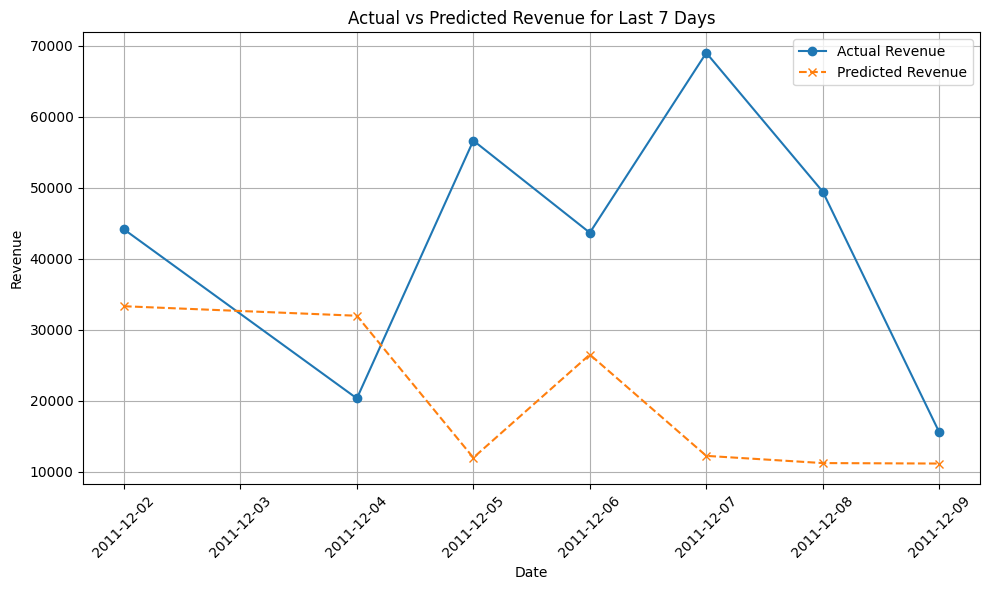

In [86]:
actual_dates=Daily_rev_df['Date'].iloc[-7:]
actual_rev=Daily_rev_df['Revenue'].iloc[-7:]
predicted_rev=future_preds_real
plt.figure(figsize=(10,6))
plt.plot(actual_dates, actual_rev, marker='o', label='Actual Revenue')
plt.plot(actual_dates, predicted_rev, marker='x', linestyle='--', label='Predicted Revenue')
plt.title('Actual vs Predicted Revenue for Last 7 Days')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
